# 0. colab 파일 기본 세팅

In [1]:
# 구글 드라이브 마운트(cjyjob1993@gmail.com)
from google.colab import drive
drive.mount('/content/drive')

# lib 디렉토리를을 환경 변수에 추가
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/myCode/lib')

Mounted at /content/drive


In [2]:
# 커스텀 라이브러리 임포트
from func_debug_log import debug

In [3]:
# debug_log (0 : 미출력, 1 : 섹션 구분 출력, 2 : 함수 실행, 3 : 조건문 출력, 4 : 반복문 출력, 5 : 함수 내부 출력, 6 : 변수 출력)
debug_flag = 6

In [4]:
if debug_flag in range(1,7) : debug('Section : colab 파일 기본 세팅', __name__)

2022.12.03 11:57:56 __main__ Section : colab 파일 기본 세팅


# 1. 문제 : 주가 분석

## [1] 목표 : 투자 수익 획득

## [2] 방법 : 기본적 분석과 기술적 분석

### <1> 기본적 분석 
+ 사회, 문화, 경제, 정치적 요인 등 외부 요인과 회사의 상태, 운영, 자본 등 내부 요인을 종합적으로 고려햐여, 회사의 본래 가치를 분석하는 것.
+ 딥러닝 기술을 접목시키기에 부적절한 특성이 많음.
  + 외부 요인을 파악하기 위한 정보를 매우 다양한 경로(신문, 재무제표, SNS, 영상 뉴스, 증권 정보, ...)를 통해 취득. 
  + 취득한 정보가 정형화 되어 있지 않음.(수치 - 주가 데이터, 텍스트 - 기사, 영상 - 뉴스, 음성 - 회사 홍보실 통화 ... )
  + 취득 불가능한 정보 (회사 내부 정보 등)
  + 수치화 하기 힘든 정보 (회사가 추구하는 가치, 운영 방침, 행동 양식)
  + 특정하기 불가능할 정도로 다양한 변수가 존재함. - 한번에 고려하려면, 차원의 저주가 불가피함
  + 분석 과정이 복잡함.
    + 예를 들어, 유가 상승과 특정 회사의 주가가 같이 상승할때, 이를 분석하기 위해 다음과 같은 것들을 고려할 수 있다.
      > + 유가 상승 이유 - 생산 감소, 소비 증가
      >  + 생산 감소, 소비 증가 이유 - 정치, 사회, 회사 내부 요인 고려
      >  + 생산 감소, 소비 증가 여파 - 유가 상승으로 인한 화폐 가치 변화, 사회적 활동 변화, 소비 형태 변화, 시장 구조 변화
      > + 주가 상승 이유 - 내부 요인(회사 활동에서 석유와의 연관성), 외부 요인(정치/사회/문화/경제 -  화폐 가치 하락)
      > + 두 현상이 화폐의 영향처럼 다양한 방면에서 갖는 연관성 고려 
    + 위의 요소들 자체도 다양한 변수가 맞물려 있어, 각각을 파악하기 위한 딥러닝 모델과 데이터 파이프라인이 필요하고 이로 해결 불가한 경우도 존재, 또 이들을 종합하여 각 변수의 영향력을 판단하는 것 역시 추가적인 딥러닝 모델이 필요하다. 

### <2> 기술적 분석
+ 투자자를 분석하여 주가의 움직임을 파악하는 것.
+ 상대적으로 딥러닝 적용이 용이함
  + 투자자를 파악할 수 있는 정보가 한정적임(고려할 변수가 적음)
    + 주가, 지수, 환율 (증권 정보) : 명확해서 별도의 전처리가 필요 없고, 수치로 표현되어 있어 딥러닝에 적합
    + SNS : 감성분석, 양을 통한 투자자 집단 전반에 대한 평가 가능
    + 그 외의 정보는 대체로 획득할 경로가 없을 뿐 아니라, 개인정보이므로 획득 자체도 불가함)
  + 변수간 연관성이 단순함(연결할 변수가 거의 없음)

### <3> 주가 및 지수의 기술적 분석 종류 

#### (1) 시계열 분석(캔들 패턴 분석)
+ 증권 정보(주가, 지수, 환율, 등)는 시간에 따라 변화하는 수치형 정보임
+ 흐름 형태를 유지하는 분석(캔들 패턴)이 필요.
+ (https://usstockfly.com/%EC%BA%94%EB%93%A4-%ED%8C%A8%ED%84%B4-%EC%A0%95%EB%A6%AC/)

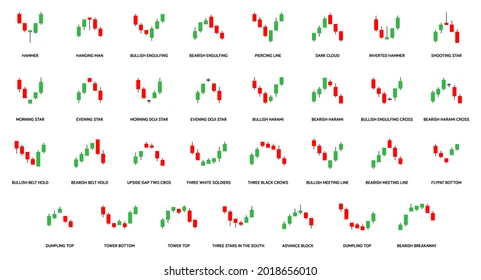

#### (2) 지지·저항 분석

+ 주가는 특정 수치를 기준으로 움직임
+ 이전 수치의 최고점, 최저점, 최빈점을 기준으로 삼음. 이때, 최고점, 최저점의 주가를 나타내는 선을 지지선 혹은 저항선이라 표현함.





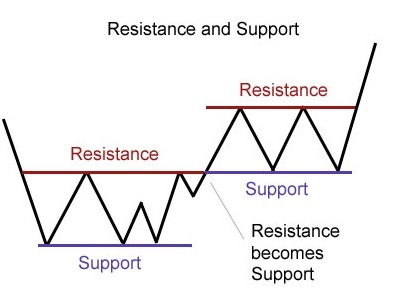

#### (3) 추세 분석
+ 주가는 일반적으로 개별 주체의 행동 결과로 파동의 형태를 띄며, 추세를 따라 움직임
+ 일반적으로 상승 추세선은 저점을 연결해, 하락 추세선은 고점들을 연결해 결정   
 이때, 두 추세선의 기울기 부호 조합에 따라, 추세를 세분화 할 수 있음
  + 상승 추세 : 수렴, 발산, 평행 
  + 횡보 추세 : 수렴, 발산, 평행 
  + 하락 추세 : 수렴, 발산, 평행




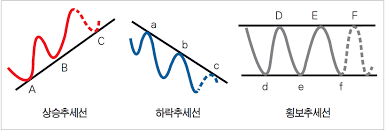

# 2. 데이터
상기한 딥러닝 분석에 대한 적합성을 바탕으로, 국내 주가 데이터 선정

## [1] 데이터 획득

+ FinanceDataReader (https://financedata.github.io/index.html)  
한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리


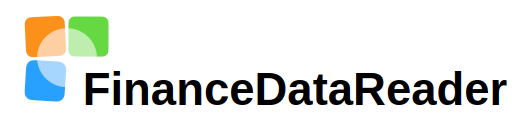

In [56]:
if debug_flag in range(1,7) : debug('Section : 데이터 획득', __name__)

2022.12.03 11:57:56 __main__ Section : 데이터 획득


In [57]:
if debug_flag in range(2,7) : debug('라이브러리 설치', __name__)
!pip install -U finance-datareader

2022.12.03 11:57:56 __main__ 라이브러리 설치
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
if debug_flag in range(2,7) : debug('라이브러리 임포트', __name__)
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import os.path          

2022.12.03 11:57:56 __main__ 라이브러리 임포트


In [59]:
if debug_flag in range(2,7) : debug('KOSPI, KOSDAQ 종목 메타 데이터 획득', __name__)
df_kospi = fdr.StockListing('KOSPI')
df_kosdaq = fdr.StockListing('KOSDAQ')

2022.12.03 11:57:56 __main__ KOSPI, KOSDAQ 종목 메타 데이터 획득


In [60]:
if debug_flag in range(6,7) : debug(f'종목 메타 데이터 확인\n\n{df_kospi.head(3)}\n{df_kosdaq.head(3)}', __name__)

2022.12.03 11:57:56 __main__ 종목 메타 데이터 확인

     Code        ISU_CD      Name Market Dept   Close ChangeCode  Changes  \
0  005930  KR7005930003      삼성전자  KOSPI        60400          2    -2200   
1  373220  KR7373220003  LG에너지솔루션  KOSPI       584000          2    -1000   
2  207940  KR7207940008  삼성바이오로직스  KOSPI       870000          2   -14000   

   ChagesRatio    Open    High     Low    Volume        Amount  \
0        -3.51   62500   62500   60400  15331184  935960853120   
1        -0.17  585000  590000  578000    239024  139765656000   
2        -1.58  884000  885000  870000     37710   32966593000   

            Marcap      Stocks MarketId  
0  360574866020000  5969782550      STK  
1  136656000000000   234000000      STK  
2   61921380000000    71174000      STK  
     Code        ISU_CD      Name         Market   Dept   Close ChangeCode  \
0  247540  KR7247540008    에코프로비엠  KOSDAQ GLOBAL  우량기업부  109900          2   
1  091990  KR7091990002  셀트리온헬스케어  KOSDAQ GLOBAL  우량기업부   6

In [61]:
if debug_flag in range(2,7) : debug('kospi, kosdaq 종목 code 리스트 획득', __name__)
df_kospi = df_kospi['Code']
df_kosdaq = df_kosdaq['Code']

2022.12.03 11:57:56 __main__ kospi, kosdaq 종목 code 리스트 획득


In [62]:
if debug_flag in range(2,7) : debug('통합 종목 code 리스트 생성', __name__)
df_codes = pd.concat([df_kospi, df_kosdaq], ignore_index=True)

2022.12.03 11:57:56 __main__ 통합 종목 code 리스트 생성


In [63]:
if debug_flag in range(6,7) : debug(f'통합 종목 리스트 확인 \n{df_codes}\n{type(df_codes)}', __name__)

2022.12.03 11:57:56 __main__ 통합 종목 리스트 확인 
0       005930
1       373220
2       207940
3       000660
4       051910
         ...  
2549    405350
2550    08537M
2551    021045
2552    050540
2553    032685
Name: Code, Length: 2554, dtype: object
<class 'pandas.core.series.Series'>


In [607]:
if debug_flag in range(2,7) : debug(f'코스피 종목 별 2022년도 주가 데이터 불러오기', __name__)

file = '/content/drive/MyDrive/Colab Notebooks/myCode/Project/data/stock_price.csv'

if os.path.isfile(file):
  if debug_flag in range(6,7) : debug(f'주가 데이터 파일을 불러옵니다', __name__)
  df_stock_price = pd.read_csv(file, index_col = ['Date', 'Code'])
else :
  if debug_flag in range(6,7) : debug(f'주가 데이터를 라이브러리로 불러옵니다.', __name__)
  df_stock_price = pd.DataFrame()
  # 코스닥, 코스피 전체 종목의 2022년도 데이터는 56만개 row가 되면서, 전처리로 세션이 다운된다. 
  for k in df_kospi: # 때문에, 코스피만 : df_codes -> df_kospi
    x = fdr.DataReader(k, '2022-09-01') # 3개월 정도 데이터로 수행. '2022' -> '2022-09-01'
    x.insert(0, 'Code', str(k))
    x = x.drop(columns = ['Change', 'Volume'])
    df_stock_price = pd.concat([df_stock_price, x])
  if debug_flag in range(6,7) : debug(f'주가 데이터를 파일로 저장합니다.', __name__)
  df_stock_price = df_stock_price.reset_index()
  df_stock_price = df_stock_price.set_index(['Date','Code'])
  df_stock_price.to_csv(file)

2022.12.03 11:57:56 __main__ 코스피 종목 별 2022년도 주가 데이터 불러오기
2022.12.03 11:57:56 __main__ 주가 데이터 파일을 불러옵니다


## [2] 데이터 전처리
+ 라이브러리를 활용해 가져온 데이터는 일별로 시가, 고가, 저가, 종가, 거래량을 나타냄.
+ 주, 월 단위로 동일한 형태를 갖도록 전처리 -> 다른 시간 단위에 대해서도 분석을 용이하게 수행할 수 있음.

In [608]:
if debug_flag in range(1,7) : debug(f'데이터 전처리', __name__)

2022.12.03 11:57:56 __main__ 데이터 전처리


In [609]:
if debug_flag in range(6,7) : debug(f'주가 데이터에서 Null값이 있는지 확인.', __name__)
for col in df_stock_price.columns:
  print(col, df_stock_price[col].isnull().sum())

2022.12.03 11:57:56 __main__ 주가 데이터에서 Null값이 있는지 확인.
Open 0
High 0
Low 0
Close 0


In [610]:
if debug_flag in range(6,7) : debug(f'주가 데이터에서 0값이 있는지 확인.', __name__)

from collections import Counter

for col in df_stock_price.columns:
  print(col, Counter(df_stock_price[col])[0])

2022.12.03 11:57:56 __main__ 주가 데이터에서 0값이 있는지 확인.
Open 557
High 557
Low 557
Close 0


In [611]:
if debug_flag in range(6,7) : debug('일부 일자에 거래가 없어, 종가만 표시하고, 나머진 0으로 표기한 경우가 존재', __name__)

2022.12.03 11:57:56 __main__ 일부 일자에 거래가 없어, 종가만 표시하고, 나머진 0으로 표기한 경우가 존재


In [612]:
if debug_flag in range(6,7) : debug('0값을 동일행의 Close의 값으로 채움.', __name__)
for tmp in ['Open', 'High', 'Low'] :
  df_stock_price[tmp] = df_stock_price['Close']

2022.12.03 11:57:56 __main__ 0값을 동일행의 Close의 값으로 채움.


In [613]:
if debug_flag in range(6,7) : debug(f'0값이 유무 재확인.', __name__)

from collections import Counter

for col in df_stock_price.columns:
  print(col, Counter(df_stock_price[col])[0])

2022.12.03 11:57:56 __main__ 0값이 유무 재확인.
Open 0
High 0
Low 0
Close 0


# 3. 딥러닝 모델

## [1] 패턴 분석(캔들 분석)

### <1> 활용 데이터
+ 연속된 캔들 몇 개의 모양을 바탕으로 딥러닝 학습
+ 캔들 5개를 학습 데이터로 사용

In [614]:
def slideWindow(code_df, days) :

  if debug_flag in range(3,7) : debug('Deeplearning을 위한 데이터 reshape 진행', __name__)

  end_idx = len(code_df) - 1

  for d in range(0,days) :
    df = code_df[d:end_idx+d-days+1].reset_index()
    if d == 0 :
      result = df
    else :
      for feature in code_df.columns :
        extracted_col = df[feature]
        result.insert(result.shape[1], f'{feature}_+{d}', extracted_col)
  return result

In [615]:
df = slideWindow(df_stock_price, 5).set_index(['Date', 'Code'])

2022.12.03 11:57:56 __main__ Deeplearning을 위한 데이터 reshape 진행


In [616]:
if debug_flag in range(3,7) : debug('Deeplearning에 사용할 데이터 -> df 바인딩', __name__)

df

2022.12.03 11:57:56 __main__ Deeplearning에 사용할 데이터 -> df 바인딩


,,Open,High,Low,Close,Open_+1,High_+1,Low_+1,Close_+1,Open_+2,High_+2,Low_+2,Close_+2,Open_+3,High_+3,Low_+3,Close_+3,Open_+4,High_+4,Low_+4,Close_+4
Date,Code,,,,,,,,,,,,,,,,,,,,
2022-09-01,005930,58400,58400,58400,58400,57500,57500,57500,57500,57100,57100,57100,57100,57100,57100,57100,57100,56000,56000,56000,56000
2022-09-02,005930,57500,57500,57500,57500,57100,57100,57100,57100,57100,57100,57100,57100,56000,56000,56000,56000,55600,55600,55600,55600
2022-09-05,005930,57100,57100,57100,57100,57100,57100,57100,57100,56000,56000,56000,56000,55600,55600,55600,55600,58100,58100,58100,58100
2022-09-06,005930,57100,57100,57100,57100,56000,56000,56000,56000,55600,55600,55600,55600,58100,58100,58100,58100,56800,56800,56800,56800
2022-09-07,005930,56000,56000,56000,56000,55600,55600,55600,55600,58100,58100,58100,58100,56800,56800,56800,56800,56000,56000,56000,56000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-21,000547,19800,19800,19800,19800,19900,19900,19900,19900,19800,19800,19800,19800,19700,19700,19700,19700,19650,19650,19650,19650
2022-11-22,000547,19900,19900,19900,19900,19800,19800,19800,19800,19700,19700,19700,19700,19650,19650,19650,19650,19400,19400,19400,19400
2022-11-23,000547,19800,19800,19800,19800,19700,19700,19700,19700,19650,19650,19650,19650,19400,19400,19400,19400,19350,19350,19350,19350


In [ ]:
if debug_flag in range(2,7) : debug('train, test 데이터 분할', __name__)

2022.12.03 04:49:49 __main__ train, test 데이터 분할


In [ ]:
X_train = df_stock_price[features]

In [ ]:
y_regg = df_stock_price[target_regg]

In [ ]:
y_bin = df_stock_price[target_bin]

### <2> 딥러닝 문제 정의

#### (1) 이진 분류
+ 가장 최근 캔들이 양봉일지, 음봉일지 예측

In [501]:
if debug_flag in range(6,7) : debug('이진분류문제 label 생성', __name__)
tmp_bin = df_stock_price['label_regg'].values
df_stock_price.insert(df_stock_price.shape[1], 'label_bin', np.where(tmp_bin >= 0.0033, 1, 0))

2022.12.03 11:57:56 __main__ 이진분류문제 label 생성


In [503]:
if debug_flag in range(6,7) : debug('이진분류문제 label Null 탐색.', __name__)
df_stock_price.isnull().sum()

2022.12.03 11:57:56 __main__ 이진분류문제 label Null 탐색.


Open          0
High          0
Low           0
Close         0
label_regg    0
label_bin     0
dtype: int64

#### (2) 회귀
+ 가장 최근 캔들의 시가, 고가, 저가, 종가 예측

In [543]:
if debug_flag in range(6,7) : debug('회귀문제 label 생성', __name__)
df_stock_price['label_regg'] = (df_stock_price['High'] - df_stock_price['Open']) / df_stock_price['Open']

2022.12.03 11:57:56 __main__ 회귀문제 label 생성


In [551]:
if debug_flag in range(6,7) : debug('Null 값 제거 후, 회귀문제 label 재생성', __name__)

null_rows = df_stock_price[df_stock_price['High'] != df_stock_price['Open']]
not_null_rows = df_stock_price[df_stock_price['High'] == df_stock_price['Open']]  

null_rows['label_regg'] = (null_rows['High'] -null_rows['Open']) / null_rows['Open']
not_null_rows = not_null_rows('Close')

2022.12.03 11:57:56 __main__ Null 값 제거 후, 회귀문제 label 재생성
Series([], dtype: float64)
Series([], dtype: float64)


,,Open,High,Low,Close,label_regg
Date,Code,,,,,
2022-09-01,005930,58400,58400,58400,58400,0.003407
2022-09-02,005930,57500,57500,57500,57500,0.005146
2022-09-05,005930,57100,57100,57100,57100,0.006969
2022-09-06,005930,57100,57100,57100,57100,0.006993
2022-09-07,005930,56000,56000,56000,56000,0.000000
...,...,...,...,...,...,...
2022-11-28,000547,19400,19400,19400,19400,0.000000
2022-11-29,000547,19350,19350,19350,19350,0.002591
2022-11-30,000547,19300,19300,19300,19300,0.007772


#### (2) 다중 분류
+ 비지도 학습을 통해, 캔들 패턴 분류

In [ ]:
if debug_flag in range(1,7) : debug(f'LSTM 모델 생성 및 학습', __name__)

2022.12.03 04:49:49 __main__ 딥러닝 모델 생성 및 학습


In [ ]:
if debug_flag in range(6,7) : debug('LSTM 라이브러리 임포트', __name__)


2022.12.03 04:49:49 __main__ LSTM 라이브러리 임포트


In [ ]:
if debug_flag in range(6,7) : debug('LSTM 파라미터 설정', __name__)

2022.12.03 04:49:49 __main__ LSTM 파라미터 설정


In [ ]:
if debug_flag in range(6,7) : debug(f'LSTM 모델 구축', __name__)

2022.12.03 04:49:49 __main__ LSTM 모델 생성


In [ ]:
if debug_flag in range(6,7) : debug(f'LSTM 모델 컴파일', __name__)

2022.12.03 04:49:49 __main__ LSTM 모델 컴파일


In [ ]:
if debug_flag in range(6,7) : debug(f'LSTM 모델 요약 출력', __name__)

2022.12.03 04:49:49 __main__ LSTM 모델 생성


In [ ]:
if debug_flag in range(6,7) : debug(f'LSTM 모델 학습', __name__)

2022.12.03 04:49:49 __main__ LSTM 모델 학습


In [ ]:
if debug_flag in range(6,7) : debug(f'LSTM 모델 시각화', __name__)

2022.12.03 04:49:49 __main__ LSTM 모델 시각화


# 4. 한계 및 보완

## [1] 한계점


### <1> 기본적 분석의 부재
+ 투자자는 회사의 가치를 바탕으로 투자하며, 주가는 투자자의 행동 결과로 결정됨.   
즉, 기본적 분석과 기술적 분석은 양립하며, 동시에 고려되어야만 정확한 주가 분석이 가능함.

## [2] 보완점